<a href="https://colab.research.google.com/github/caiocmello/Introduction-to-SA-Training-CAIS/blob/main/NetzDG_context.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install and import: Run this cell to load the data (use 'df_netzdg_blue&purple.csv' as data)

In [ ]:
import pandas as pd
import nltk
import spacy
import plotly.express as px
import plotly.graph_objects as go
import re
import os
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from spacy.lang.en.stop_words import STOP_WORDS as en_stopwords
from spacy.lang.de.stop_words import STOP_WORDS as de_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Load the data frame into colab
url = 'df_netzdg_blue&purple.csv'
df = pd.read_csv(url,index_col=0)
pd.set_option('display.max_colwidth', None)
# prompt: remove duplicated values in column 'text'
df.drop_duplicates(subset='text', inplace=True)

## Context Analysis

In [ ]:
# @title Choose a word to see context (PS: if column 'word' is 'None', word is probably used as hashtag in text)
word = "Zensur" # @param {type:"string"}

sentences_with_word = df[df['text'].str.contains(word, case=False, na=False)]

# Split the sentences at the word 'x'
split_sentences = sentences_with_word['text'].str.split(word, n=1, expand=True)

# Rename the columns
split_sentences.columns = ['Before', 'After']
split_sentences.insert(1, 'word', word)
split_sentences['word'] = split_sentences.apply(lambda row: 'None' if pd.isnull(row['After']) else row['word'], axis=1)
split_sentences

,Before,word,After
tweet_id,,,
1005776215104479238,"Das #NetzDG fördere ""Selbstzensur im Kopf und Fremdzensur durch private Unternehmen"", finden @jimmyschulz und @ManuelHoeferlin und wollen dagegen klagen. https://t.co/vIn46STodL",None,None
1005774756405276672,RT @FAZ_NET „,Zensur,"in ihrer schlimmsten Form“, so nennt der #FDP-Bundestagsabgeordnete @ManuelHoeferlin das Netzwerkdurchsetzungsgesetz. Zusammen mit @jimmyschulz klagt er vor dem Verwaltungsgericht Köln gegen das #NetzDG. https://t.co/VMbBly2Xoe"
1005855572913213440,"Ich halte es, bei aller berechtigter Kritik am NetzDG, für äußerst kontraproduktiv, das als „",Zensur,in ihrer schlimmsten Form“ zu bezeichnen. Da gibt es viele schlimmere Zensurmöglichkeiten. Das sollten die Liberalen MdBs auch wissen. https://t.co/z6HRv3g4P3
1022776042191249408,RT @m_hoppenstedt Uuund noch mehr NetzDG-Minuspunkte:\r\n- Populisten können sich leicht als Opfer von ‘,Zensur,"’ stilisieren, weil Hintergründe von Löschungen nicht durch staatliche Institutionen entschieden (siehe von Storch, siehe Sellner)\r\nDazu diese Anleitung v @PatrickBeuth https://t.co/C9mB5n6THD"
1055467624086335488,RT @PiratenUlm #Netzwerkdurchsetzungsgesetz olé!\r\n\r\n#,Zensur,https://t.co/K9emMX3hY7
...,...,...,...
992705731215454208,"""Mutti"" und Maas kritisieren kann ganz schön bös ausgehen ... #APO2018 @Widerstand_D #Meinungsfreiheit #NetzDG #Rechtsstaat #",Zensur,#Demokratur \r\nhttps://t.co/mUApgqSeIV
994901182849134592,"@lawyerberlin vs. Team Denunzianten: 132 : 0. Das ist ein nicht so überzeugendes Ergebnis, liebe Denunzianten und #Maas-Männchen. #",Zensur,gesetz #NetzDG https://t.co/RUcEhbGxQW
996658097824419840,Die #,Zensur,nimmt weltweit Ausmaße an und trifft offenbar selbst den Präsidenten der #USA @realDonaldTrump. Konservative und #AfD-Unterstützer sind ebenfalls betroffen. #shadowban #NetzDG https://t.co/1mi0AovkjZ


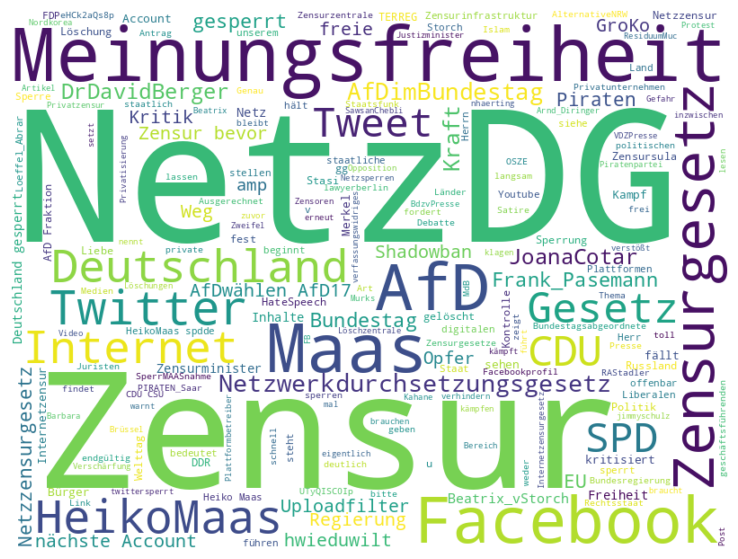

In [ ]:
# @title Generate a wordcloud with the most mentioned words in text where the word chosen above is mentioned
# prompt: create a wordcloud with words mentioned in column 'text' when word 'Zensur' is found

from wordcloud import WordCloud
import matplotlib.pyplot as plt

stopwords_de = list(de_stopwords)
stopwords_en = list(en_stopwords)
stopwords = stopwords_de + stopwords_en #create a mixed list of stopwords (German and English)
# Edit your list of stopwords manually
add_to_stopwords = ['rt', 'https', 't', 'co']
stopwords = stopwords + add_to_stopwords

sentences_with_word = df[df['text'].str.contains(word, case=False, na=False)]
text = " ".join(sentences_with_word['text'].tolist())

wordcloud = WordCloud(width=800, height=600, background_color='white', stopwords=stopwords).generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# @title Choose a word to see context per cluster (blue or purple)
cluster = 'purple' # @param {type:"string"}

df_cluster = df[df['cluster'] == cluster]
sentences_with_word_cluster = df_cluster[df_cluster['text'].str.contains(word, case=False, na=False)]

# Split the sentences at the word 'x'
split_sentences_cluster = sentences_with_word_cluster['text'].str.split(word, n=1, expand=True)

# Rename the columns
split_sentences_cluster.columns = ['Before', 'After']
split_sentences_cluster.insert(1, 'word', word)
split_sentences_cluster['word'] = split_sentences_cluster.apply(lambda row: 'None' if pd.isnull(row['After']) else row['word'], axis=1)
split_sentences_cluster

,Before,word,After
tweet_id,,,
1001362303416258567,Da werden jetzt regelrechte Klagewellen einsetzen ... #Facebook #NetzDG #,Zensur,#Sperre #Zensur #Löschungen #Twitter\r\nhttps://t.co/nd2ivn70n9
1004061313717293056,Oder war es der Ausdruck #Kahanegefängnis in einem Urlaubsvideo? https://t.co/mWyAAj9pTt #NetzDG #Facebook #Sperre #,Zensur,#Löschzentrale
1004048293066952704,"3 Stunden nachdem ich dieses Video auf #facebook gepostet hatte, wurde ich für 30 Tage gesperrt. Ich hatte vom #Kahanegefängnis gesprochen. #zensur #kahane #NetzDG https://t.co/GF2mUpSGBy",None,None
1006886067377725440,"Satireverdächtig! Europa wird nicht ""besser"" durch ständige Ausdehnung (#Westbalkan!), Machtzentralisierung in Brüssel,",Zensur,"(#NetzDG), Schuldenvergemeinschaftung (#ESM) oder Kriminalisierung konservativer Opposition. ""Nationalismus"" &amp; ""Populismus"" sind nicht unsere Probleme! https://t.co/7XiiwgjGvU"
1008340323595153408,"Twitter macht sich die Mühe, meine Tweets an die betriebsinterne Stasi weiterzuleiten und ggf. auszusortieren. #Shadowban\r\n\r\nProphylaktische",Zensur,", um Vorkommnisse wie den #17Juni zukünftig zu verhindern. Toll, dass Twitter sich kümmert. Schöne Grüße an #Maas und #Kahane. #NetzDG https://t.co/L0K35p2XcE"
...,...,...,...
992705731215454208,"""Mutti"" und Maas kritisieren kann ganz schön bös ausgehen ... #APO2018 @Widerstand_D #Meinungsfreiheit #NetzDG #Rechtsstaat #",Zensur,#Demokratur \r\nhttps://t.co/mUApgqSeIV
994901182849134592,"@lawyerberlin vs. Team Denunzianten: 132 : 0. Das ist ein nicht so überzeugendes Ergebnis, liebe Denunzianten und #Maas-Männchen. #",Zensur,gesetz #NetzDG https://t.co/RUcEhbGxQW
996658097824419840,Die #,Zensur,nimmt weltweit Ausmaße an und trifft offenbar selbst den Präsidenten der #USA @realDonaldTrump. Konservative und #AfD-Unterstützer sind ebenfalls betroffen. #shadowban #NetzDG https://t.co/1mi0AovkjZ


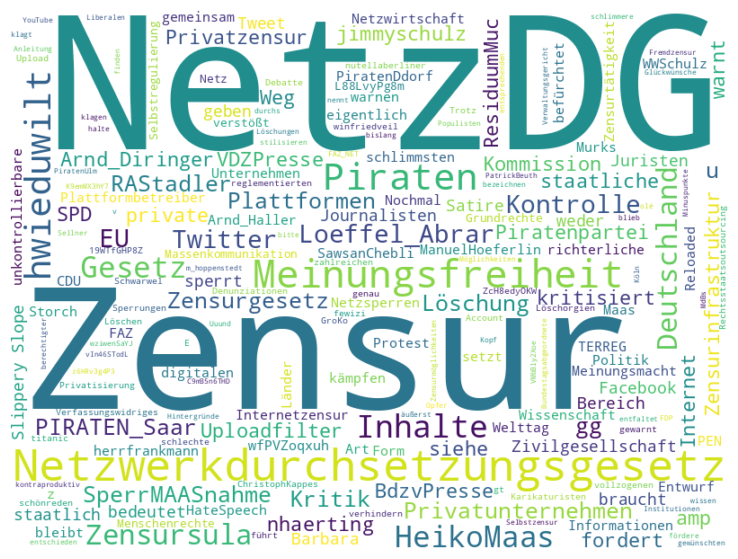

In [ ]:
# @title Generate a wordcloud for BLUE
# prompt: create a wordcloud with words mentioned in column 'text' when word 'Zensur' is found

df_blue = df[df['cluster'] == 'blue']
df_purple = df[df['cluster'] == 'purple']
sentences_with_word_blue = df_blue[df_blue['text'].str.contains(word, case=False, na=False)]
sentences_with_word_purple = df_purple[df_purple['text'].str.contains(word, case=False, na=False)]

text_blue = " ".join(sentences_with_word_blue['text'].tolist())
text_purple = " ".join(sentences_with_word_purple['text'].tolist())

wordcloud_b = WordCloud(width=800, height=600, background_color='white', stopwords=stopwords).generate(text_blue)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_b, interpolation='bilinear')
plt.axis('off')
plt.show()

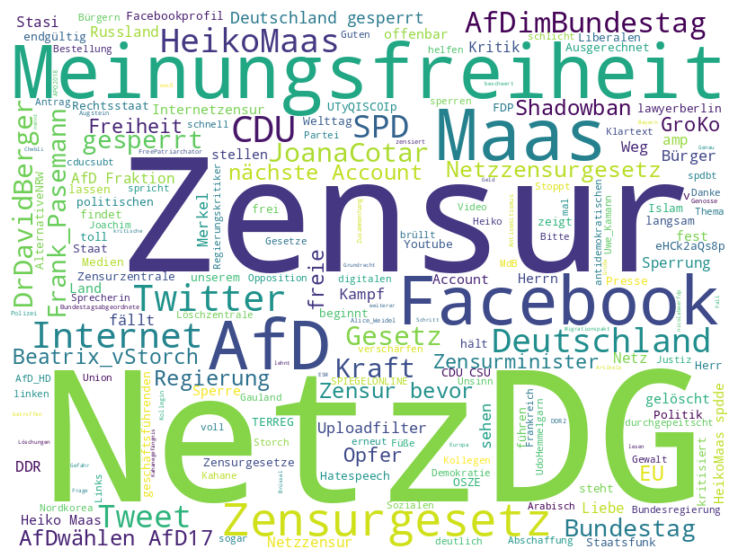

In [ ]:
# @title Generate a wordcloud for PURPLE
wordcloud_p = WordCloud(width=800, height=600, background_color='white', stopwords=stopwords).generate(text_purple)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_p, interpolation='bilinear')
plt.axis('off')
plt.show()